# Задание 11

**Модель Тейла-Вейджа (аддитивная, учитывает тренд и сезонность)**

In [ ]:
!pip install --upgrade xlrd

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/PDA-210')

In [ ]:
dataS=pd.read_excel('data.xls', sheet_name='Sales')
dataP=pd.read_excel('data.xls', sheet_name='Prices')
dataI=pd.read_excel('data.xls', sheet_name='Income')

In [ ]:
sales = dataS.values[1,2:]
prices = dataP.values[1,2:]
income = dataI.values[1,2:]

In [ ]:
X=list(zip(income, prices))

In [ ]:
X

In [ ]:
y=sales

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_

13786.33039570633

In [ ]:
model.coef_

array([ -0.22045598, 150.30350096])

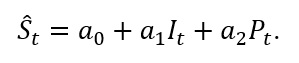

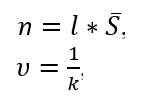

In [ ]:
a0=[model.intercept_]
a0

In [ ]:
a1=[model.coef_[0]]
a1

[-0.22045598200494607]

In [ ]:
a2=[model.coef_[1]]
a2

[150.30350096045535]

In [ ]:
np.mean(sales)

20662.791666666668

In [ ]:
l=0.1

In [ ]:
nu=l*np.mean(sales)
nu

2066.2791666666667

In [ ]:
k=3
v=1/k
v

0.3333333333333333

In [ ]:
sales_sa =[]
borderu = []
borderd = []
error = []
gamma = []

In [ ]:
sales_sa.append(a0[0]+a1[0]*income[0]+a2[0]*prices[0])
sales_sa

[20821.969469795127]

In [ ]:
error.append(sales[0]-sales_sa[0])
error

[478.0305302048728]

In [ ]:
gamma.append(v*abs((abs(error[0])-nu)/error[0]))
gamma

[1.1074945609165083]

In [ ]:
borderu.append(sales_sa[0]+nu)
borderu

[22888.248636461794]

In [ ]:
borderd.append(sales_sa[0]-nu)
borderd

[18755.69030312846]

In [ ]:
for i in range(1,len(sales)):
  if abs(error[i-1])>nu:
    a0.append(a0[i-1]+gamma[i-1]*error[i-1])
    a1.append(a1[i-1]+gamma[i-1]*error[i-1]/income[i-1])
    a2.append(a2[i-1]+gamma[i-1]*error[i-1]/prices[i-1])
  else:
    a0.append(a0[i-1])
    a1.append(a1[i-1])
    a2.append(a2[i-1])
  sales_sa.append(a0[i]+a1[i]*income[i]+a2[i]*prices[i])
  error.append(sales[i]-sales_sa[i])
  gamma.append(v*abs((abs(error[i])-nu)/error[i]))
  borderu.append(sales_sa[i]+nu)
  borderd.append(sales_sa[i]-nu)

In [ ]:
income_new=np.load('income_new.npy')
income_new

array([16469.20253334, 16626.13808955, 16783.07364576, 16940.00920197,
       17096.94475818, 17253.88031438, 17410.81587059, 17567.7514268 ,
       17724.68698301, 17881.62253922, 18038.55809542, 18195.49365163])

In [ ]:
prices_new=np.load('prices_new.npy')
prices_new

array([79.14359603, 77.69263114, 73.08666994, 68.09320422, 63.5772429 ,
       59.90877662, 60.20530802, 66.44934708, 68.41338496, 74.52242016,
       77.77645538, 82.05799152])

In [ ]:
sales_new=a0[47]+a1[47]*income_new+a2[47]*prices_new

In [ ]:
sales_up=sales_new+nu

In [ ]:
sales_down=sales_new-nu

In [ ]:
t=np.arange(1,len(y)+1)
t

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [ ]:
t_new=np.arange(len(y)+1,len(y)+13)
t_new

array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60])

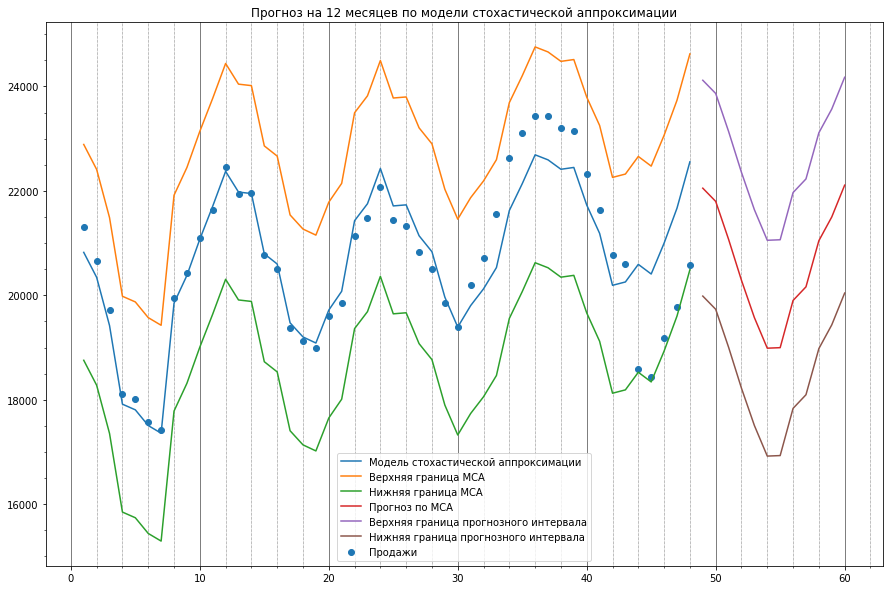

In [ ]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.scatter(t, sales, label = 'Продажи')
ax.plot(t, sales_sa, label = 'Модель стохастической аппроксимации')
ax.plot(t, borderu, label = 'Верхняя граница МСА')
ax.plot(t, borderd, label = 'Нижняя граница МСА')
ax.plot(t_new, sales_new, label = 'Прогноз по МСА')
ax.plot(t_new, sales_up, label = 'Верхняя граница прогнозного интервала')
ax.plot(t_new, sales_down, label = 'Нижняя граница прогнозного интервала')

ax.grid(which = 'major', axis = 'x', linestyle = '-', linewidth = '0.5', color = 'black')

ax.minorticks_on()

ax.grid(which = 'minor', axis = 'x', linestyle = ':', linewidth = '0.5', color = 'black')

ax.set_axisbelow(True)

ax.legend()

plt.title('Прогноз на 12 месяцев по модели стохастической аппроксимации')

plt.show()